# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import your libraries
# For data management
import pandas as pd
import numpy as np
import seaborn as sns
import os
# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# IF YOU GET AN ERROR HERE run: pip install scikit-image
from skimage import io
from skimage.color import rgb2gray


# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 


# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv("data/fashion-small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isna().sum()
df.dropna()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,Shirt,0,0,0,0,0,0,0,1,0,...,126,102,0,0,0,0,0,0,0,0
5998,T-shirt/top,0,0,1,0,0,0,0,0,0,...,89,91,96,0,0,2,0,0,0,0


### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()
df.drop_duplicates()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,Shirt,0,0,0,0,0,0,0,1,0,...,126,102,0,0,0,0,0,0,0,0
5998,T-shirt/top,0,0,1,0,0,0,0,0,0,...,89,91,96,0,0,2,0,0,0,0


### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(normalize = True)

Sandal         0.107667
Trouser        0.102000
Ankle boot     0.100833
Shirt          0.100167
Pullover       0.099667
Coat           0.099500
T-shirt/top    0.098333
Dress          0.097500
Bag            0.097333
Sneaker        0.097000
Name: label, dtype: float64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 

columns = df.columns
# Convert the all columns object into a regular list
columns = list(columns)

# Sanity check that it is now just a list.
print(type(columns))

# Remove just the label column from the list

columns.remove("label")

<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

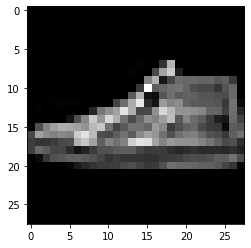

In [7]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[columns].values

# Select just one image from all the images

img = imgs[400]
# Reshape the image to be a 28x28 matrix (original format of image)
img= img.reshape(28,28)

# Plot reshaped image
plt.imshow(img, cmap = "gray")

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [8]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list

selected_features = list(selected_features)
# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove("label")

<class 'list'>


### 2. Define our `X` and `y`

In [9]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df["label"]

### 3. Train-test-split our `X` and `y` data

In [10]:
# 3. Train-test-split our `X` and `y` data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [11]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [12]:
# 2. Fit that model with our training data. 
model.fit(x_train,y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [13]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(x_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.826667


### 2. Make new predictions using our test data. 

In [14]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(x_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [15]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Ankle boot       0.87      0.92      0.89       119
         Bag       0.92      0.94      0.93       122
        Coat       0.77      0.79      0.78       119
       Dress       0.78      0.82      0.80       129
    Pullover       0.68      0.78      0.73       103
      Sandal       0.94      0.92      0.93       142
       Shirt       0.69      0.50      0.58       127
     Sneaker       0.88      0.84      0.86       129
 T-shirt/top       0.73      0.83      0.78       103
     Trouser       0.99      0.92      0.95       107

    accuracy                           0.83      1200
   macro avg       0.82      0.83      0.82      1200
weighted avg       0.83      0.83      0.82      1200



### 4. Plot the confusion matrix of our predicted results. 

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


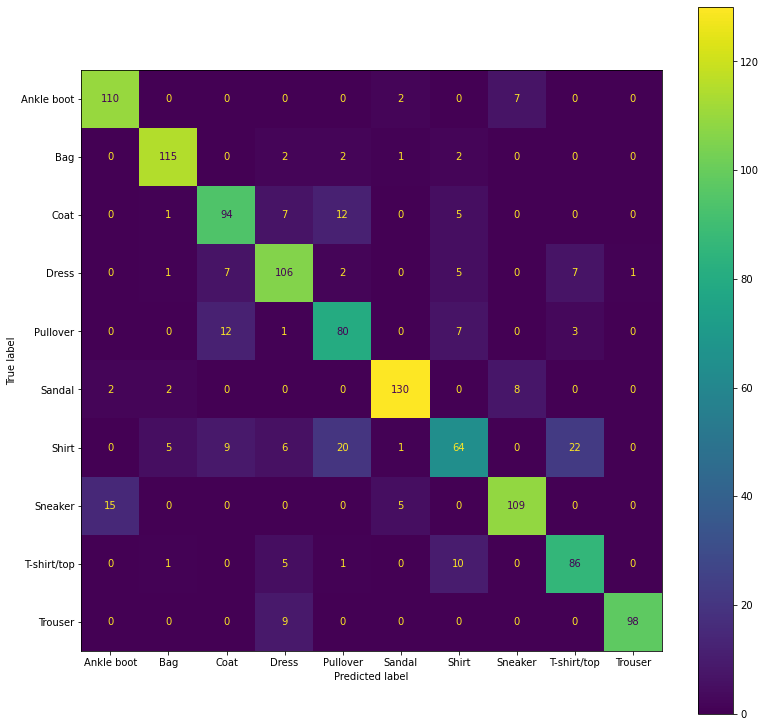

In [16]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=x_test, 
                              y_true=y_test, 
                              ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [17]:
print('The classifier mistaked Coat and Pullover the most.')

The classifier mistaked Coat and Pullover the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [18]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(metrics.classification_report(y_test, y_pred))
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator = model,
                                 X = x_test,
                                 y_true = y_test,
                                 ax =ax )
    return model

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

              precision    recall  f1-score   support

  Ankle boot       0.91      0.94      0.92       122
         Bag       0.93      0.92      0.93       121
        Coat       0.69      0.75      0.72       115
       Dress       0.82      0.82      0.82       120
    Pullover       0.75      0.71      0.73       133
      Sandal       0.95      0.86      0.91       140
       Shirt       0.57      0.55      0.56       121
     Sneaker       0.84      0.88      0.86       117
 T-shirt/top       0.71      0.76      0.74       113
     Trouser       0.96      0.94      0.95        98

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression()

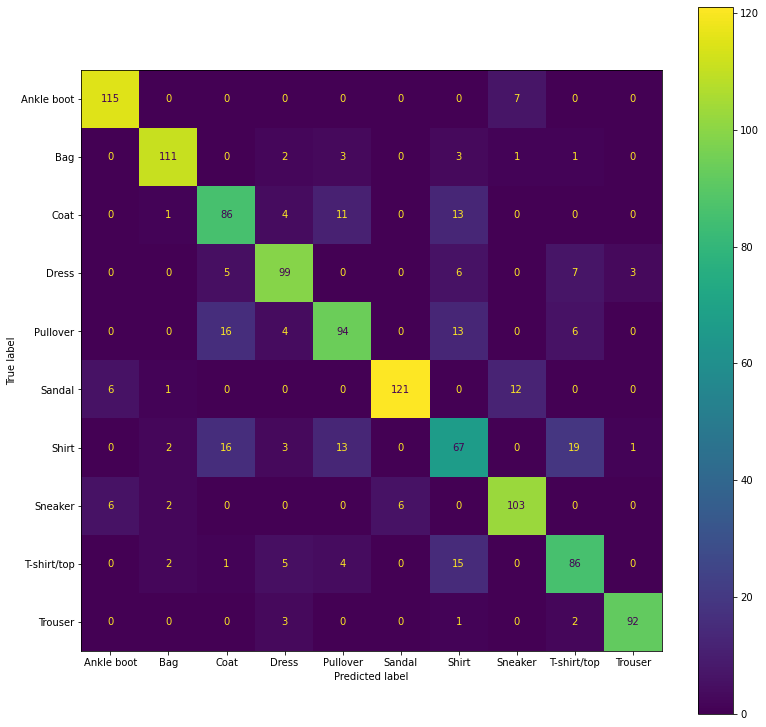

In [19]:
# LogisticRegression
lr = LogisticRegression()
build_and_eval_model(lr, X, y)

              precision    recall  f1-score   support

  Ankle boot       0.92      0.92      0.92       122
         Bag       0.91      0.96      0.94       121
        Coat       0.70      0.80      0.74       115
       Dress       0.84      0.94      0.89       120
    Pullover       0.77      0.74      0.75       133
      Sandal       0.95      0.91      0.93       140
       Shirt       0.68      0.52      0.59       121
     Sneaker       0.89      0.91      0.90       117
 T-shirt/top       0.81      0.82      0.82       113
     Trouser       0.97      0.94      0.95        98

    accuracy                           0.84      1200
   macro avg       0.84      0.85      0.84      1200
weighted avg       0.84      0.84      0.84      1200



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier()

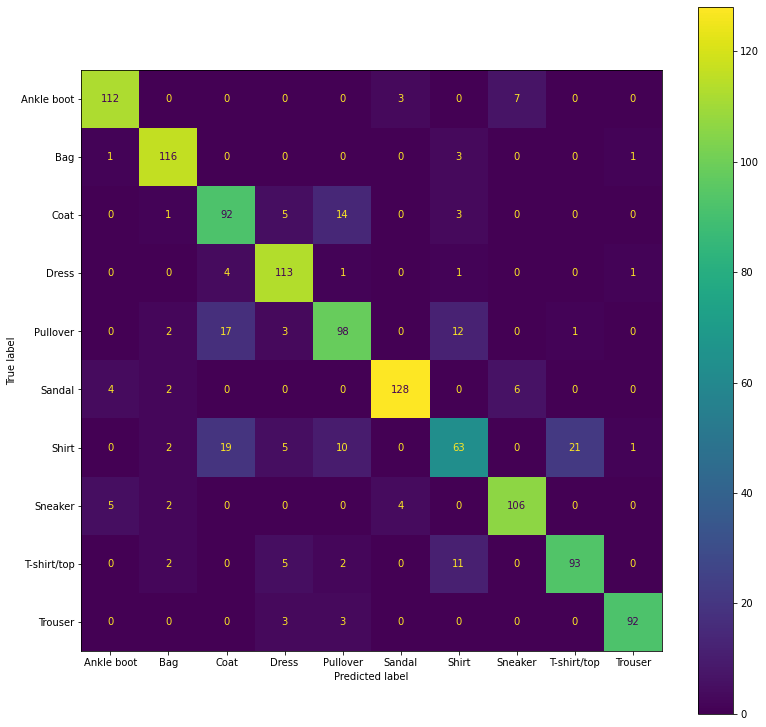

In [20]:
# RandomForest
rf = RandomForestClassifier()
build_and_eval_model(rf, X,y)

              precision    recall  f1-score   support

  Ankle boot       0.69      0.85      0.76       122
         Bag       0.88      0.85      0.87       121
        Coat       0.42      0.55      0.47       115
       Dress       0.67      0.90      0.77       120
    Pullover       0.65      0.60      0.62       133
      Sandal       0.79      0.08      0.14       140
       Shirt       0.33      0.14      0.20       121
     Sneaker       0.51      0.93      0.66       117
 T-shirt/top       0.73      0.81      0.76       113
     Trouser       0.96      0.89      0.92        98

    accuracy                           0.64      1200
   macro avg       0.66      0.66      0.62      1200
weighted avg       0.66      0.64      0.60      1200



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

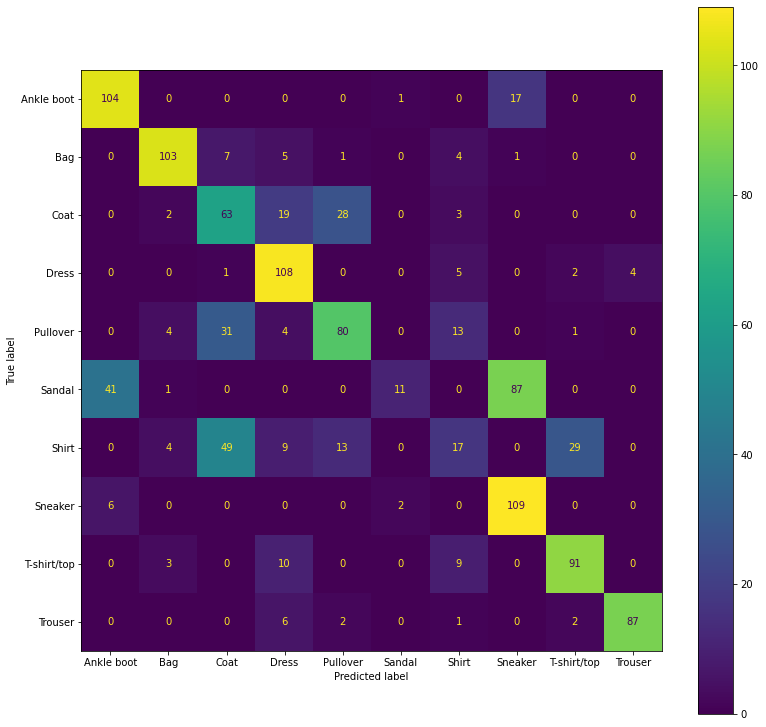

In [21]:
# MultinomialNB
mnb = MultinomialNB()
build_and_eval_model(mnb,X,y)

In [22]:
print('RandomForestClassifier and Support Vector Classifier model did the best and MultinomialNB model did the worst.')

RandomForestClassifier and Support Vector Classifier model did the best and MultinomialNB model did the worst.


# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 

In [23]:
from glob import glob


In [24]:
train_path = "data/seg_train/seg_train"
test_path = "data/seg_test/seg_test"

In [25]:
train_csv = pd.DataFrame(columns=["id", "classify"])

(150, 150, 3)


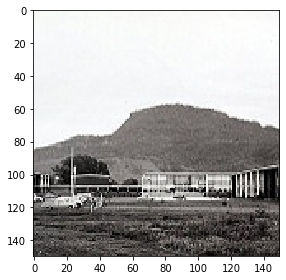

In [26]:
img = io.imread(train_path + "/buildings/0.jpg")

print(img.shape)
io.imshow(img)

In [50]:
train_csv_id =[]
train_csv_classify=[]
file_path=[]
for i in os.listdir(train_path):
    count = 0
    for fn in os.listdir(train_path +"/" + i):
        train_csv_id.append(fn)
        train_csv_classify.append(i)
        file_path.append(str(train_path+"/"+i+"/"+fn))
        count +=1
train_csv["id"] = train_csv_id
train_csv["classify"] = train_csv_classify
train_csv["file_path"] = file_path

In [51]:
train_csv.shape

(14034, 3)

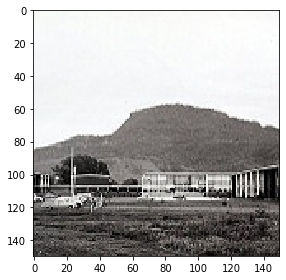

In [53]:
image_path = train_csv.iloc[0]["file_path"]
image = io.imread(image_path)
io.imshow(image)


In [32]:
color_images = []
gray_images =[]
file_path = train_csv["file_path"].values
for image in file_path:
    color_image = io.imread(image)
    gray_image = rgb2gray(color_image)
    gray_images.append(gray_image.flatten())
    color_images.append(color_image.flatten())
color_images


14034

67500